In [301]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [302]:
data = pd.read_csv("Expanded_data_with_more_features.csv")
data = data.drop("Unnamed: 0", axis=1)

In [303]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### Розподіл за статтю серед учнів.

In [304]:
male_count = len(data.loc[data["Gender"] == "male"])
male_count

15217

In [305]:
female_count = len(data.loc[data["Gender"] == "female"])
female_count

15424

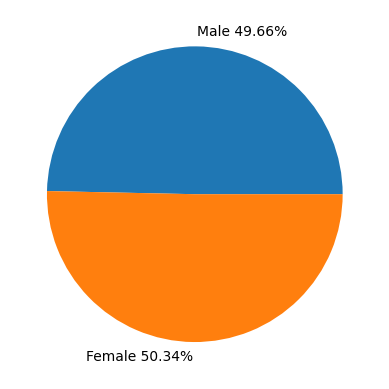

In [306]:
count = len(data["Gender"])
male_percent = round(male_count/count * 100, 2)
female_percent = round(female_count/count * 100, 2)

plt.pie([male_count, female_count], labels=[f"Male {male_percent}%", f"Female {female_percent}%"])
plt.show()

### Зв’язок між етнічною групою та результатами тестів.

In [307]:
ethnic = data.groupby("EthnicGroup")["MathScore"].median()
f"Math: {ethnic.idxmax()} - {ethnic.max()}"

'Math: group E - 76.0'

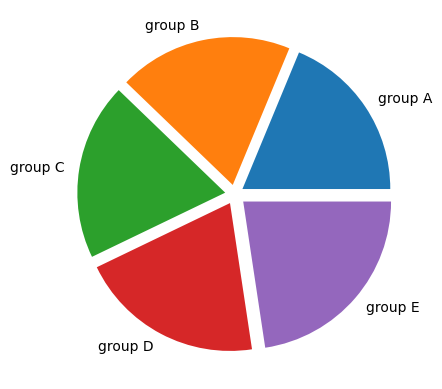

In [308]:
plt.pie(ethnic, labels = ethnic.keys(), explode = ethnic/1000)
plt.show()

In [309]:
ethnic = data.groupby("EthnicGroup")["ReadingScore"].median()
f"Reading: {ethnic.idxmax()} - {ethnic.max()}"

'Reading: group E - 75.0'

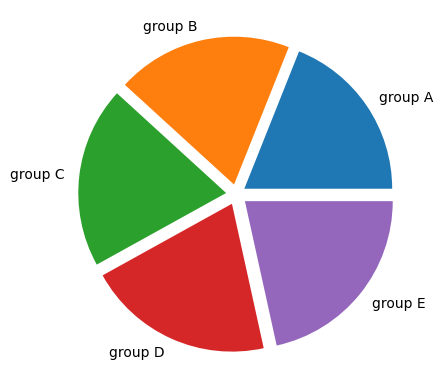

In [310]:
plt.pie(ethnic, labels = ethnic.keys(), explode = ethnic/1000)
plt.show()

In [311]:
ethnic = data.groupby("EthnicGroup")["WritingScore"].median()
f"Writing: {ethnic.idxmax()} - {ethnic.max()}"

'Writing: group E - 73.0'

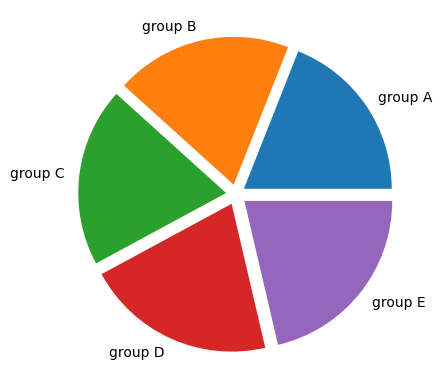

In [312]:
plt.pie(ethnic, labels = ethnic.keys(), explode = ethnic/1000)
plt.show()

### Вплив курсу підготовки до тесту на результати тесту.

In [313]:
test = data.groupby("TestPrep")["MathScore"].median()
f'Math: {test["completed"]}'

'Math: 70.0'

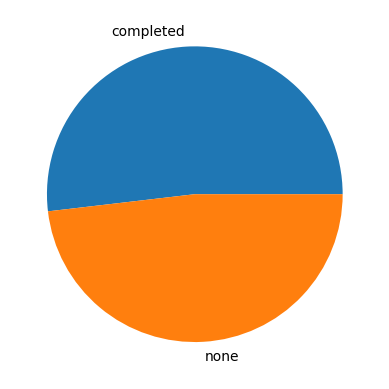

In [314]:
plt.pie(test, labels = test.keys())
plt.show()

In [315]:
test = data.groupby("TestPrep")["ReadingScore"].median()
f'Reading: {test["completed"]}'

'Reading: 74.0'

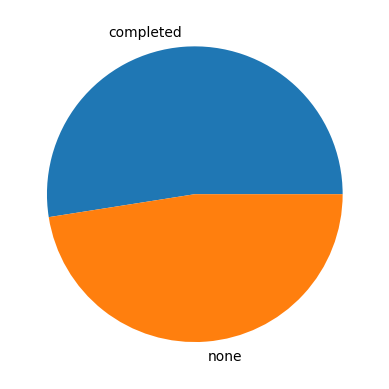

In [316]:
plt.pie(test, labels = test.keys())
plt.show()

In [317]:
test = data.groupby("TestPrep")["WritingScore"].median()
f'Writing: {test["completed"]}'

'Writing: 75.0'

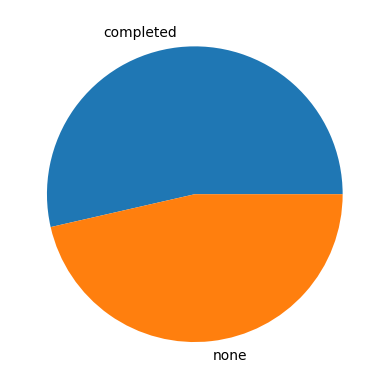

In [318]:
plt.pie(test, labels = test.keys())
plt.show()

###  Розподіл батьків(ів) за сімейним станом серед учнів.

In [319]:
parents = data.groupby("ParentMaritalStatus")["ParentMaritalStatus"].count()
parents["married"]

16844

In [320]:
parents["single"]

7097

### Зв’язок між заняттями спортом і результатами тестів.

In [321]:
sport = data.groupby("PracticeSport")["MathScore"].median()
sport["regularly"] > sport["never"]

True

In [322]:
sport = data.groupby("PracticeSport")["ReadingScore"].median()
sport["regularly"] > sport["never"]

True

### Розподіл транспортних засобів до школи серед учнів.

In [323]:
transport = data.groupby("TransportMeans")["TransportMeans"].count()
transport["school_bus"]

16145

In [324]:
transport["private"]

11362

# Задача класифікації

In [325]:
data = data.dropna()

In [326]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(data.drop("TestPrep", axis=1))
X[:5]

array([[ 0.,  1.,  3.,  1.,  2.,  2.,  1.,  4.,  1.,  1., 81., 82., 81.],
       [ 1.,  2.,  4.,  1.,  1.,  2.,  1.,  0.,  1.,  0., 70., 67., 65.],
       [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0., 67., 73., 69.],
       [ 0.,  1.,  4.,  1.,  3.,  0.,  0.,  1.,  0.,  0., 79., 82., 79.],
       [ 1.,  1.,  4.,  0.,  1.,  2.,  1.,  1.,  0.,  2., 35., 32., 29.]])

In [327]:
y = np.array([0 if i == "none" else 1 for i in data["TestPrep"].values])
y[:5]

array([0, 0, 0, 1, 0])

In [328]:
len(X)

19243

In [329]:
len(y)

19243

In [330]:
X_train, X_test, y_train, y_test = X[:9000], X[9000:], y[:9000], y[9000:]

In [331]:
y_train_1 = (y_train == 1)

In [332]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=13)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(random_state=13)

In [333]:
sgd_clf.predict([X[130]])

array([ True])

In [334]:
y[130]

1

In [335]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.657     , 0.60633333, 0.697     ])

In [336]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

In [337]:
X_valid, X_train_2 = X_train[:5000], X_train[5000:]
y_valid, y_train_2 = y_train[:5000], y_train[5000:]

In [338]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/100
282/282 [==============================] - 1s 2ms/step - loss: 1.7778 - accuracy: 0.6300 - val_loss: 0.2033 - val_accuracy: 0.6866
Epoch 2/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1952 - accuracy: 0.7069 - val_loss: 0.1850 - val_accuracy: 0.7244
Epoch 3/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1908 - accuracy: 0.7113 - val_loss: 0.2479 - val_accuracy: 0.5968
Epoch 4/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1868 - accuracy: 0.7216 - val_loss: 0.1863 - val_accuracy: 0.7242
Epoch 5/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1991 - accuracy: 0.7040 - val_loss: 0.1834 - val_accuracy: 0.7332
Epoch 6/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1962 - accuracy: 0.7092 - val_loss: 0.2115 - val_accuracy: 0.6668
Epoch 7/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1974 - accuracy: 0.7093 - val_loss: 0.2030 - val_accuracy: 0.7004

Epoch 58/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1804 - accuracy: 0.7346 - val_loss: 0.1929 - val_accuracy: 0.7058
Epoch 59/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.7369 - val_loss: 0.1798 - val_accuracy: 0.7266
Epoch 60/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1791 - accuracy: 0.7366 - val_loss: 0.1748 - val_accuracy: 0.7382
Epoch 61/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1812 - accuracy: 0.7322 - val_loss: 0.1923 - val_accuracy: 0.7056
Epoch 62/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1772 - accuracy: 0.7390 - val_loss: 0.1959 - val_accuracy: 0.7048
Epoch 63/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.7348 - val_loss: 0.1760 - val_accuracy: 0.7354
Epoch 64/100
282/282 [==============================] - 0s 1ms/step - loss: 0.1797 - accuracy: 0.7294 - val_loss: 0.1781 - val_accuracy:

In [339]:
proba = model.predict(X_test[:4])
proba.round(2)

1/1 [==============================] - 0s 39ms/step


array([[0.34],
       [0.11],
       [0.87],
       [0.45]], dtype=float32)

In [340]:
results = model.evaluate(X_test, y_test)
print(f"Test loss: {results[0]}, Test accuracy:{results[1]}")

321/321 [==============================] - 0s 703us/step - loss: 0.1801 - accuracy: 0.7331
Test loss: 0.18008442223072052, Test accuracy:0.7330859899520874


In [341]:
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(X_train_2, y_train_2, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
125/125 [==============================] - 1s 3ms/step - loss: 1.0317 - accuracy: 0.6158 - val_loss: 0.7549 - val_accuracy: 0.4166
Epoch 2/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6355 - val_loss: 0.6682 - val_accuracy: 0.6542
Epoch 3/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6551 - accuracy: 0.6385 - val_loss: 0.6290 - val_accuracy: 0.6542
Epoch 4/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6568 - val_loss: 0.6833 - val_accuracy: 0.6542
Epoch 5/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6513 - val_loss: 0.6259 - val_accuracy: 0.6542
Epoch 6/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6505 - val_loss: 0.6070 - val_accuracy: 0.6664
Epoch 7/30
125/125 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.6582 - val_loss: 0.6022 - val_accuracy: 0.6876
Epoch 

In [342]:
proba = model.predict(X_test[:4])
proba.round(2)

1/1 [==============================] - 0s 39ms/step


array([[0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.84, 0.16, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [343]:
y_pred = np.argmax(model.predict(X_test[:4]), axis=-1)
y_pred

1/1 [==============================] - 0s 17ms/step


array([0, 0, 1, 1], dtype=int64)

In [344]:
y_test[:4]

array([0, 0, 1, 1])

In [345]:
y_test[:4] == y_pred

array([ True,  True,  True,  True])

In [346]:
results = model.evaluate(X_test, y_test)
print(f"Test loss: {results[0]}, Test accuracy:{results[1]}")

321/321 [==============================] - 0s 795us/step - loss: 0.5729 - accuracy: 0.7071
Test loss: 0.572934627532959, Test accuracy:0.7071170806884766
